In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [195]:
cal=pd.read_csv('C:\\Users\\DELL\\Desktop\\Project2\\calories.csv')

In [196]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [197]:
exe=pd.read_csv('C:\\Users\\DELL\\Desktop\\Project2\\exercise.csv')

In [198]:
exe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [199]:
df=pd.concat([exe,cal['Calories']],axis=1)
# axis=1 implies we are going to concat it horizontally

In [200]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [201]:
# now basically i am trying to build a calorie prediction model 

# DATA VISUALISATION

In [202]:
df.isnull().sum()
# no NaN entries 
# also this is going to be supervised ML problem , specifically it is a regression problem 
# so i have the option of applying Random Forest Regressor 

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [203]:
# let us see how much of the data is male and female , one would want ot have equal data of males and females to prevent biasness

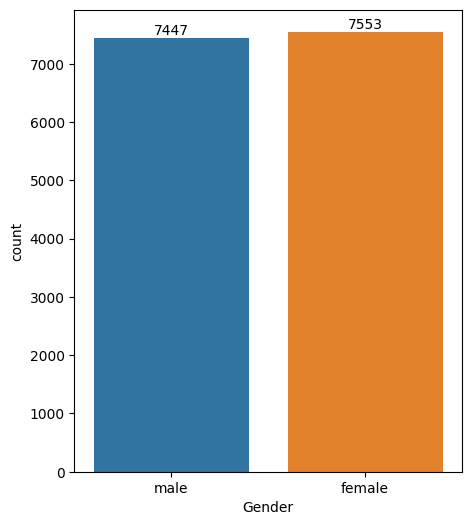

In [204]:
plt.figure(figsize=(5,6))
ax=sns.countplot(x=df['Gender'])
for i in ax.containers:
    ax.bar_label(i)
    # so the good part about this data is that we have almost the same amout of male and females in the data set
    # so we dont really have to worry about the data being bias 

In [205]:
# i want to see the average height of males vs average height of females in the data set 
# we can do this using group by clause
gp=df.groupby(['Gender'],as_index=False)['Height'].mean().sort_values(by='Height',ascending=False)

In [206]:
gp.head()

,Gender,Height
1,male,184.667517
0,female,164.405931


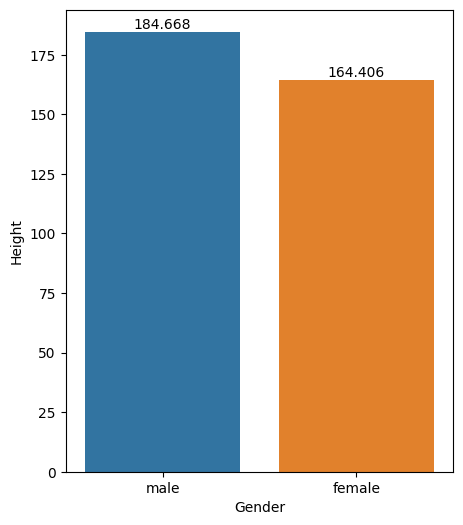

In [207]:
plt.figure(figsize=(5,6))
ax=sns.barplot(x=gp['Gender'],y=gp['Height'])
for i in ax.containers:
    ax.bar_label(i)
# so we can clearly see that the average male height in the data is 184.668 
# and the average female height is 164.406

In [208]:
# let us ahev a look at average duration of workout done by a female anbd male 
gp2=df.groupby(['Gender'],as_index=False)['Duration'].mean()

In [209]:
gp2.head()
# clealy we can see that the average duration of workout isnt much different 

,Gender,Duration
0,female,15.502185
1,male,15.559420


In [210]:
# let us find out theh minium age of female in the data 
df.groupby(['Gender'],as_index=False)['Age'].min()
# we can see that the mean and median ag

,Gender,Age
0,female,20
1,male,20


In [211]:
# let us see how many calories a male is burning at average 
g=df.groupby(['Gender'],as_index=False)['Calories'].mean()

In [212]:
g
# males are burning 2 more calories at an averagae as compared to females 

,Gender,Calories
0,female,88.153052
1,male,90.945750


# DATA PREPRocess

In [213]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [214]:
df['Intensity']=0.4*df['Duration']+0.3*df['Heart_Rate']+0.3*df['Body_Temp']

In [215]:
df_=df.drop(columns=['User_ID'])

In [216]:
df__=df.drop(columns=['User_ID','Gender'])

In [217]:
df_.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intensity
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,55.34
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,45.89
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,40.01
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,47.35
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,40.24


In [218]:
df['Height'].corr(df['Weight']) # now this corr varies from -1 to 1 and , we say it is not correlated if its 0 , directly corelated 
# if it is 1 and inversly corelated if it is -1

0.9584507809662526

In [219]:
df__.corr()
# from here i would like to combine Height and Weight to form a new column called BMI

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intensity
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.012513
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,-0.002201
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.001146
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.969863
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.954099
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.883503
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.963823
Intensity,0.012513,-0.002201,0.001146,0.969863,0.954099,0.883503,0.963823,1.000000


In [220]:
# as per my observation 

In [221]:
df_['BMI']=df_['Weight']/((df_['Height']/100)**2)
df['BMI']=df['Weight']/((df['Height']/100)**2)

In [222]:
df_.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intensity,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,55.34,26.038781
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,45.89,21.773842
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,40.01,24.655910
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,47.35,22.159109
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,40.24,24.456063


In [223]:
df_.drop(columns=['Height','Weight'],inplace=True)

In [224]:
df_.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Intensity,BMI
0,male,68,29.0,105.0,40.8,231.0,55.34,26.038781
1,female,20,14.0,94.0,40.3,66.0,45.89,21.773842
2,male,69,5.0,88.0,38.7,26.0,40.01,24.655910
3,female,34,13.0,100.0,40.5,71.0,47.35,22.159109
4,female,27,10.0,81.0,39.8,35.0,40.24,24.456063


In [225]:
dfg=df.drop(columns=['User_ID','Height','Weight','Gender','Duration','Heart_Rate','Body_Temp'])


In [226]:
dfg.head()

,Age,Calories,Intensity,BMI
0,68,231.0,55.34,26.038781
1,20,66.0,45.89,21.773842
2,69,26.0,40.01,24.655910
3,34,71.0,47.35,22.159109
4,27,35.0,40.24,24.456063


In [227]:
dfg.corr()

,Age,Calories,Intensity,BMI
Age,1.000000,0.154395,0.012513,0.255609
Calories,0.154395,1.000000,0.963823,0.056473
Intensity,0.012513,0.963823,1.000000,0.009153
BMI,0.255609,0.056473,0.009153,1.000000


In [228]:
# i can construct a new column called Workout_Intensity , which will be constructed out of Duration  Heart_Rate , Body_Teamp

In [229]:
df_.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Intensity,BMI
0,male,68,29.0,105.0,40.8,231.0,55.34,26.038781
1,female,20,14.0,94.0,40.3,66.0,45.89,21.773842
2,male,69,5.0,88.0,38.7,26.0,40.01,24.655910
3,female,34,13.0,100.0,40.5,71.0,47.35,22.159109
4,female,27,10.0,81.0,39.8,35.0,40.24,24.456063


In [230]:
df_.drop(columns=['Duration','Heart_Rate','Body_Temp'],inplace=True)

In [232]:
df_.head(2)

,Gender,Age,Calories,Intensity,BMI
0,male,68,231.0,55.34,26.038781
1,female,20,66.0,45.89,21.773842


# Train_Test_Split

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X=df_.drop(columns=['Calories'])

In [238]:
Y=df_.iloc[:,2:3]

In [242]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# PIPELINE

In [255]:
x_train.head(2)

,Gender,Age,Intensity,BMI
1154,female,38,38.25,23.458562
9804,male,30,42.78,25.507493


In [270]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# action plan
# One Hot Encoding and then MinMaxScaling
# we would want to normalize the data as well we will use power transformation

In [257]:
trf1=ColumnTransformer(transformers=[('encode',OneHotEncoder(drop='first',sparse_output=False),['Gender'])],remainder='passthrough')

In [258]:
trf2=ColumnTransformer(transformers=[('scale',MinMaxScaler(),[0,1,2,3])],remainder='passthrough')

In [264]:
trf3=ColumnTransformer(transformers=[('transform',PowerTransformer(method='yeo-johnson'),[0,1,2,3])],remainder='passthrough')

# Random Forest

In [274]:
trf4=RandomForestRegressor()

In [280]:
trf5=LinearRegression()

In [275]:
pipe=make_pipeline(trf1,trf2,trf3,trf4)

In [276]:
pipe.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('columntransformer-3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 3])])),
                ('randomforestregressor', RandomForestRegressor())])

In [277]:
y_pred=pipe.predict(x_test)

In [278]:
from sklearn.metrics import r2_score

In [279]:
print(r2_score(y_test,y_pred))

0.9896434595215469


# Linear REGRESSION

In [281]:
pipe2=make_pipeline(trf1,trf2,trf3,trf5)

In [282]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('columntransformer-3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 3])])),
                ('linearregression', LinearRegression())])

In [284]:
y_pred2=pipe2.predict(x_test)

In [285]:
print(r2_score(y_test,y_pred2))

0.9489277832485081


# TEST

In [287]:
x_test.head()

,Gender,Age,Intensity,BMI
7592,female,41,51.24,25.013521
3551,male,70,55.77,26.874948
9698,female,53,43.39,22.720438
3759,male,36,36.92,26.315068
2353,female,46,53.48,23.808690


In [288]:
y_test.head()

,Calories
7592,127.0
3551,224.0
9698,38.0
3759,6.0
2353,137.0


# MODEL 1 (EXPECTED OUTPUT - 224)

In [303]:

# Convert the input data into a pandas DataFrame
input_data = pd.DataFrame(np.array([['male', 70, 55.77, 26.874948]]),columns=x_train.columns)

# Predict using the pipeline
print(pipe.predict(input_data))

[227.08]


# MODEL 2 (EXPECTED OUTPUT -224)

In [304]:

# Convert the input data into a pandas DataFrame
input_data = pd.DataFrame(np.array([['male', 70, 55.77, 26.874948]]),columns=x_train.columns)

# Predict using the pipeline
print(pipe2.predict(input_data))

[[189.41753417]]
